## Third exercise: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

**Problem solved using pandas**

In [1]:
# Display the first lines of the searches.csv file to identify the key column parameters and delimiter
from itertools import islice
with open("searches.csv") as f:
    print(list(islice(f, 3)))

['Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice\n', '2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA\n', '2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5cf2986e8e02^MD^ATH^MIL^0^1^ATH^MIL^2013-01-04^^^^^^^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^KIV\n']


In [3]:
import pandas as pd

# Create a Dataframe object of the searches.csv file
searches = pd.read_csv('searches.csv',sep='^',usecols={'Date','Destination'})

# Convert the 'Date' column to a date datatype and remove rows with non-dates values
searches['Date']=pd.to_datetime(searches['Date'],errors='coerce')
searches = searches[pd.notnull(searches['Date'])]

searches.head(3)

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO


Since the 3 cities studied could each have multiple airports, we first combine the *searches* dataframe with an airports list file. We then filter the dataframe by cities instead of the aiport_name (IATA). Although not specified in the requirements, we assume that the analysis should only be applied to Spain's cities. Therefore, we make sure that cities around the world with the same name are discarded (e.g., Barcelona in Venezuela).

Note: The duplicates found in the dataset were kept for this analysis (no requirements in the text provided). Results can be updated if required.

In [4]:
# Create a Dataframe object of the airport_list.csv file
airports_list = pd.read_csv('airports.csv',usecols={'IATA/FAA','City','Country'})
airports_list.head(3)

,City,Country,IATA/FAA
0,Goroka,Papua New Guinea,GKA
1,Madang,Papua New Guinea,MAG
2,Mount Hagen,Papua New Guinea,HGU


In [5]:
# Merge the 2 dataframes into a new object using the IATA code
searches_expended = pd.merge(searches,airports_list,right_on='IATA/FAA', how='left',left_on='Destination')
searches_expended.head(3)

,Date,Destination,City,Country,IATA/FAA
0,2013-01-01,AUH,Abu Dhabi,United Arab Emirates,AUH
1,2013-01-01,MIL,Milan,Italy,MIL
2,2013-01-01,SFO,San Francisco,United States,SFO


In [6]:
# Filter the dataframe and set Date as index
temp = searches_expended[((searches_expended['City'] == "Barcelona")|(searches_expended['City'] == "Madrid")\
                      |(searches_expended['City'] == "Malaga")) & (searches_expended['Country'] == "Spain")][['Date','City']]
searches_filtered = temp.set_index('Date')
searches_filtered.head(3)

# Add columns for combining results 
searches_filtered['Month'] = searches_filtered.index.month
searches_filtered['Count'] = 1

# Combine results according to month and city. A pivot method is used to enable time series operations with the three cities
searches_combined = searches_filtered.groupby(['City','Month'],as_index=False).sum().pivot(index='Month', columns='City',
                                                                                           values='Count')

# Print results
searches_combined

City,Barcelona,Madrid,Malaga
Month,,,
1,29469,24258,9633
2,28329,22800,8379
3,30552,24681,10659
4,31236,25251,8265
5,28728,26334,10830
6,26505,22800,7923
7,29241,22971,8892
8,27075,21888,7866
9,23427,21204,8151


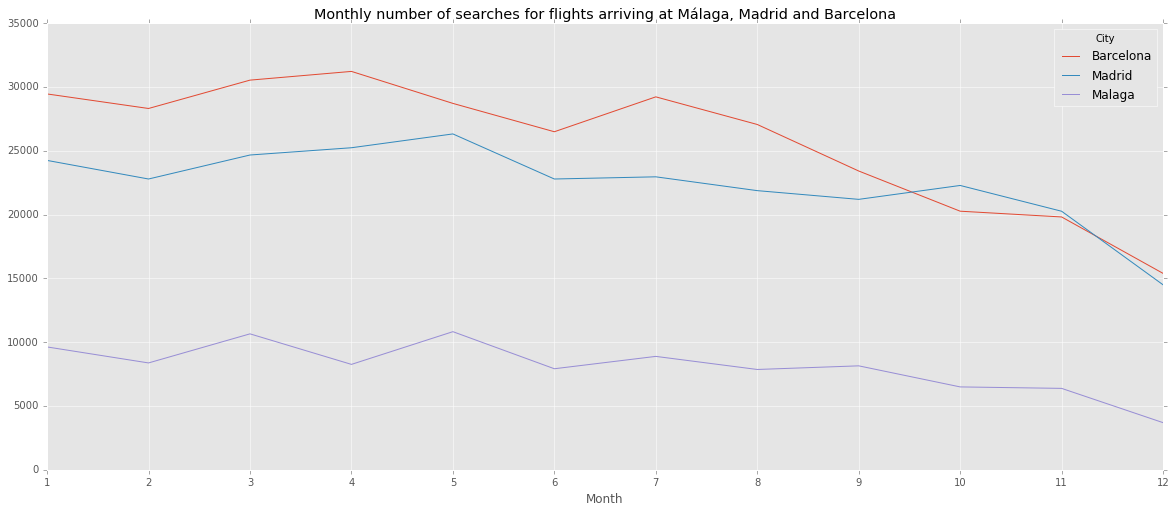

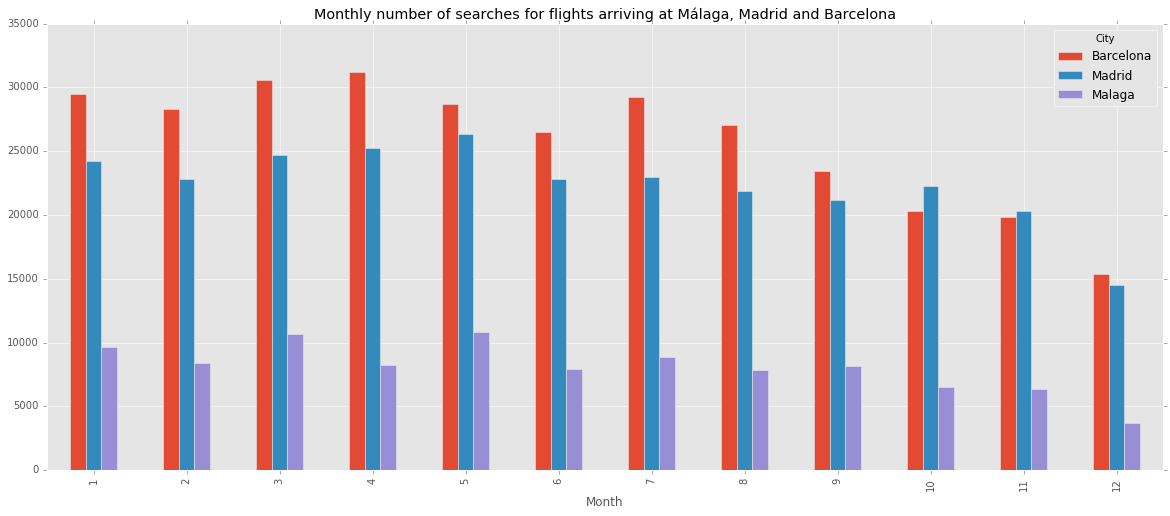

In [7]:
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('ggplot')
# magic command tells matplotlib to render figures as static images in the Notebook.
%matplotlib inline 

plt.figure();

# Plot curves
searches_combined.plot(kind='line',figsize =(20,8),title ='Monthly number of searches for flights arriving at Málaga, \
Madrid and Barcelona',xticks =[1,2,3,4,5,6,7,8,9,10,11,12]);

# Plot graph. Bars seem to be more appropriate for this analysis
searches_combined.plot(kind='bar',figsize =(20,8),title ='Monthly number of searches for flights arriving at Málaga, \
Madrid and Barcelona',xticks =[1,2,3,4,5,6,7,8,9,10,11,12]);